In [32]:
#importing all libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading the dataset
df=pd.read_csv(r"C:\Users\Palaksh\Downloads\zomato.csv\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
#checking the columns and removin all those which are not important 

df.columns
df=df.drop(['url','address','listed_in(city)','dish_liked','phone','menu_item','reviews_list'], axis=1)


In [4]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [5]:
#handling the mising values

df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [6]:
#as we have the rate column with higher null values present in it 

df.rate.unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
#as we can see that rate column is having 'NEW' and '-' 
#creating a function to remove the above mentioned from the rate column

def handlerate(rate):
    if(rate=='NEW' or rate=='-'):
        return np.nan
    else:
        rate=str(rate).split('/')
        rate=rate[0]
        return float(rate)

In [8]:
df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [9]:
df.rate.value_counts()
#replacing all the null values with the mode which is 3.9 asits occurence is large 

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [32]:
df['rate']=df['rate'].fillna(df['rate'].mode()[0])
df.rate.value_counts()

3.9    14024
3.8     3873
3.7     3821
3.6     3316
4.0     3183
4.1     2948
3.5     2784
3.4     2476
3.3     2310
4.2     2184
3.2     1873
4.3     1693
3.1     1561
4.4     1147
3.0     1023
2.9      802
4.5      656
2.8      600
2.7      307
4.6      300
2.6      260
4.7      167
2.5      101
2.4       70
4.8       66
4.9       55
2.3       51
2.2       26
2.1       24
2.0       11
1.8        5
Name: rate, dtype: int64

In [10]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [11]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [12]:
df.dropna(inplace=True)
df.isnull().sum()
#all the null values have been successfully removed

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [13]:
#checking the dtypes 

df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)     object
listed_in(type)                 object
dtype: object

In [14]:
df['approx_cost']=df['approx_cost(for two people)']

In [15]:
df.head()
df=df.drop(['approx_cost(for two people)'], axis=1)

In [42]:
df.head()
#renamed the column now changing the dtype of approx_cost from object to float 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),approx_cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,600


In [16]:
df.approx_cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [17]:
def handlecost(cost):
    if ',' in cost:
        cost=str(cost).replace(',','')
        return float(cost)
    else:
        return float(cost)

In [18]:
df['approx_cost']=df['approx_cost'].apply(handlecost)

In [19]:
df.approx_cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

In [20]:
df.approx_cost.dtypes
#as we have successfully changed the dtype of the approx_cost colun to float 

dtype('float64')

In [21]:
df.dtypes
#remaining all the dtypes are correct 

name                object
online_order        object
book_table          object
rate               float64
votes                int64
location            object
rest_type           object
cuisines            object
listed_in(type)     object
approx_cost        float64
dtype: object

In [22]:
#checking the rest type column
df.rest_type.value_counts()
#all the rest_type with lower vales making a cluster of them as others 

Quick Bites                   13885
Casual Dining                  9614
Cafe                           3369
Dessert Parlor                 1850
Delivery                       1667
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [23]:
rest_types=df['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                   13885
Casual Dining                  9614
Cafe                           3369
Dessert Parlor                 1850
Delivery                       1667
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [24]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

Bakery                        704
Beverage Shop                 640
Bar                           640
Food Court                    498
Bar, Casual Dining            385
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Bakery, Beverage Shop           1
Quick Bites, Kiosk              1
Name: rest_type, Length: 80, dtype: int64

In [25]:
#now creating a function

def handlerest(rest):
    if (rest in rest_types_lessthan1000):
        return 'others'
    else:
        return rest

In [26]:
df['rest_type']=df['rest_type'].apply(handlerest)

In [27]:
df.rest_type.value_counts()

Quick Bites           13885
Casual Dining          9614
others                 8507
Cafe                   3369
Dessert Parlor         1850
Delivery               1667
Takeaway, Delivery     1279
Casual Dining, Bar     1092
Name: rest_type, dtype: int64

In [28]:
#now handling the location column 

location = df['location'].value_counts(ascending = False)

location_lessthan300 = location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value


In [29]:
df['location']=df['location'].apply(handle_location)

In [30]:
df.location.value_counts()

others                   4676
BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1410
Bannerghatta Road        1226
Koramangala 7th Block    1055
Koramangala 6th Block    1054
Brigade Road             1052
Bellandur                 997
Sarjapur Road             854
Koramangala 1st Block     852
Ulsoor                    849
Koramangala 4th Block     841
Electronic City           834
MG Road                   793
Banashankari              744
Kalyan Nagar              692
Malleshwaram              641
Residency Road            604
Richmond Road             604
Basavanagudi              595
Frazer Town               566
Church Street             546
Brookefield               543
New BEL Road              506
Kammanahalli              493
Lavelle Road              481
Cunningham Road           475
Banaswadi 

In [69]:
#handling the cuisines column

cuisines=df['cuisines'].value_counts(ascending=False)

cuisines_lessthan100 = cuisines[cuisines<100]

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()


others                                 26220
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

## DATA VISUALIZATION PART 

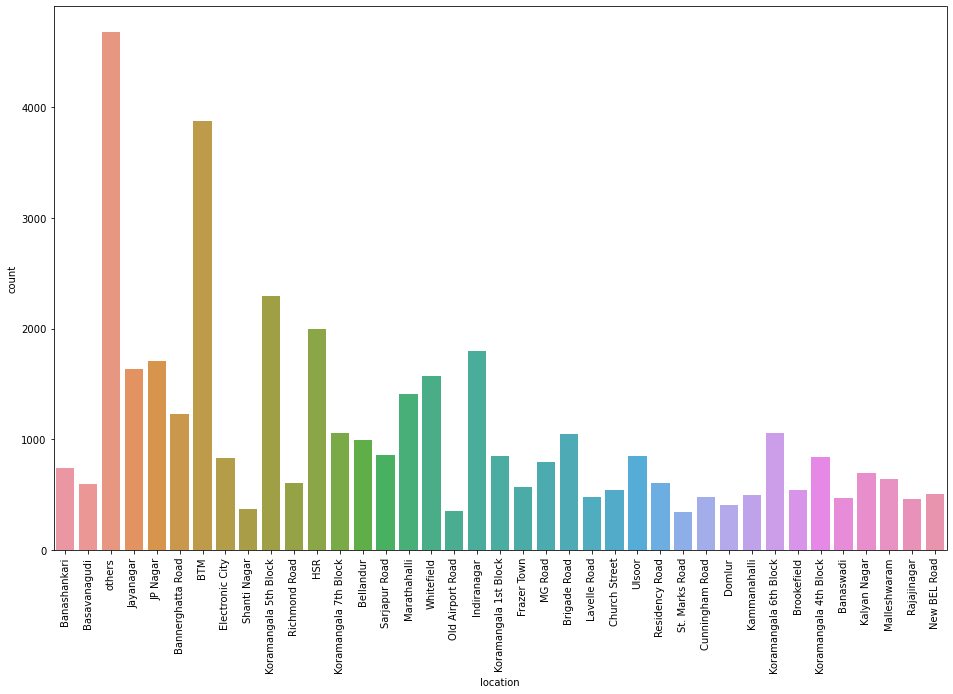

In [34]:
#count plot of various locations

plt.figure(figsize= (16,10))
ax=sns.countplot(df['location'])
plt.xticks(rotation=90)
import warnings
warnings.filterwarnings("ignore")


<AxesSubplot:xlabel='online_order', ylabel='count'>

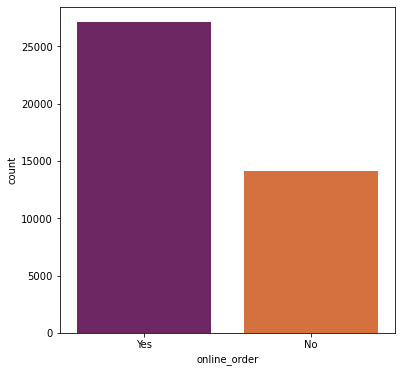

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(df['online_order'] ,palette='inferno')

<AxesSubplot:xlabel='book_table', ylabel='count'>

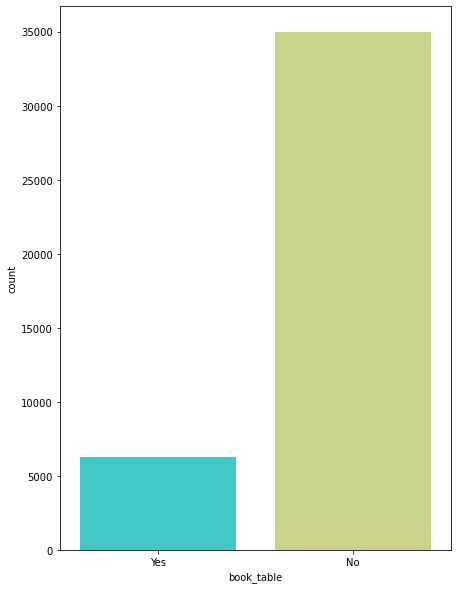

In [38]:
#checking for the rest how many of them are having book table facility

plt.figure(figsize=(7,10))
sns.countplot(df['book_table'] , palette='rainbow')

<AxesSubplot:xlabel='online_order', ylabel='rate'>

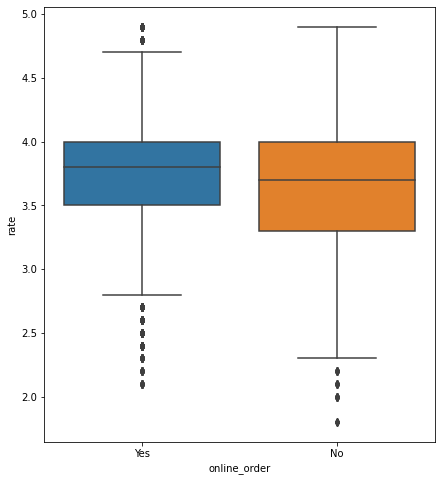

In [39]:
#visualizing the online order and rate

plt.figure(figsize=(7,8))
sns.boxplot(x='online_order' , y='rate' , data=df)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

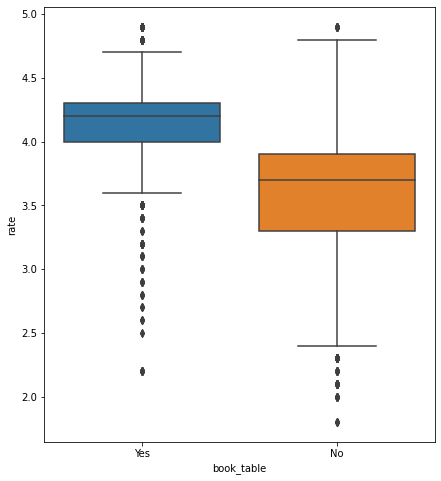

In [40]:
#book_table vs rate
plt.figure(figsize=(7,8))
sns.boxplot(x='book_table' , y='rate' , data=df)

In [46]:
#visualizing the online order facility location wise

df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv(r'location_online.csv')
df1

#making the pivot table 

df1 = pd.pivot_table(df1,values=None , index=['location'] , columns=['online_order'] , fill_value=0 , aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1018  2861
Banashankari            273   471
Banaswadi               171   297
Bannerghatta Road       398   828
Basavanagudi            183   412
Bellandur               331   666
Brigade Road            442   610
Brookefield             159   384
Church Street           212   334
Cunningham Road         156   319
Domlur                  188   218
Electronic City         364   470
Frazer Town             196   370
HSR                     334  1659
Indiranagar             542  1258
JP Nagar                560  1150
Jayanagar               402  1232
Kalyan Nagar            245   447
Kammanahalli            160   333
Koramangala 1st Block   152   700
Koramangala 4th Block   353   488
Koramangala 5th Block   771  1526
Koramangala 6th Block   408   646
Koramangala 7th Block   314   741
Lavelle Road            284   197
MG Road                 436   357
Malleshwaram            247   394
Marathahalli            446   964
New BEL Road            157   349
Old Airport Road        159   194
Rajajinagar             182   279
Residency Road          374   230
Richmond Road           378   226
Sarjapur Road           200   654
Shanti Nagar            173   195
St. Marks Road          176   167
Ulsoor                  296   553
Whitefield              612   956
others                 1709  2967

<AxesSubplot:xlabel='location'>

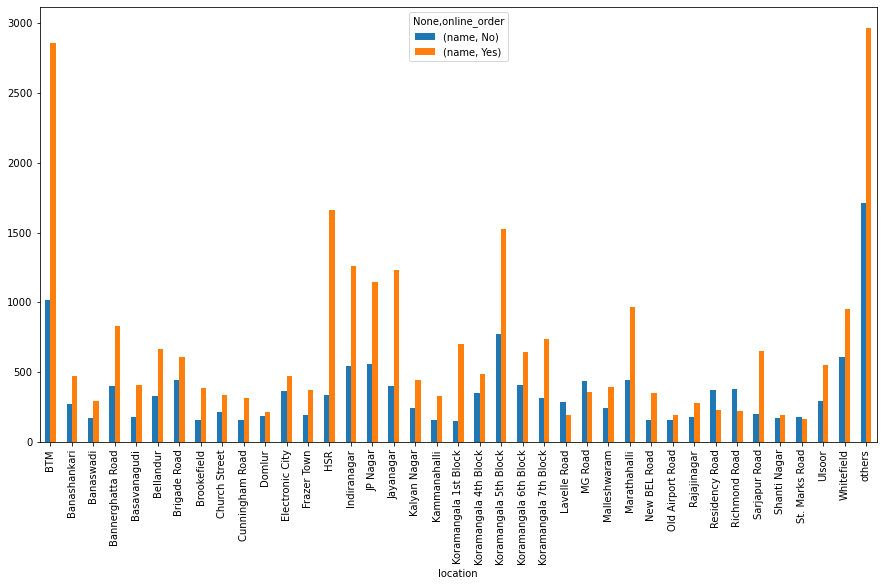

In [47]:
df1.plot( kind='bar' , figsize=(15,8))

<AxesSubplot:xlabel='rest_type', ylabel='rate'>

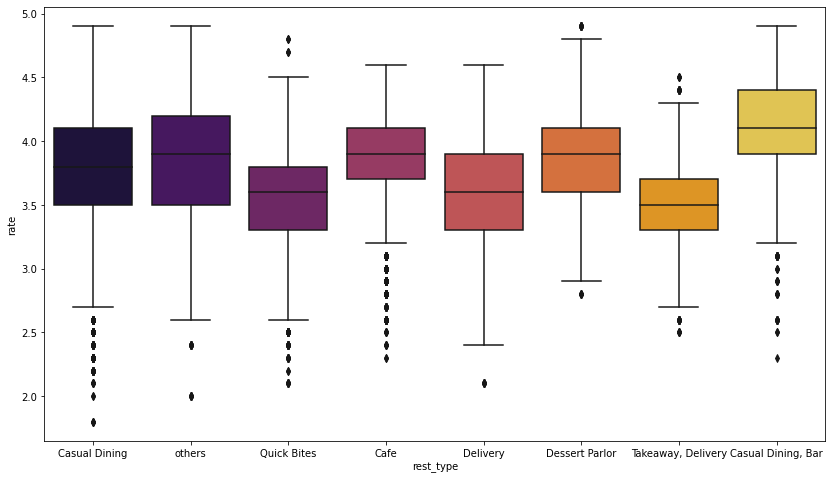

In [50]:
#visualizing types of rate and restaurants

plt.figure(figsize=(14,8))
sns.boxplot(x='rest_type',y='rate', data=df ,palette='inferno')

In [51]:
#grouping rest_Types location wise

df2 = df.groupby(['location','rest_type'])['name'].count()
df2.to_csv('location_online.csv')
df2=pd.read_csv(r'location_online.csv')
df2

,location,rest_type,name
0,BTM,Cafe,246
1,BTM,Casual Dining,639
2,BTM,"Casual Dining, Bar",21
3,BTM,Delivery,189
4,BTM,Dessert Parlor,83
...,...,...,...
287,others,Delivery,317
288,others,Dessert Parlor,92
289,others,Quick Bites,1834
290,others,"Takeaway, Delivery",170


In [53]:
df2 = pd.pivot_table(df2,values=None , index=['location'] , columns=['rest_type'] , fill_value=0 , aggfunc=np.sum)
df2

name                                            \
rest_type             Cafe Casual Dining Casual Dining, Bar Delivery   
location                                                               
BTM                    246           639                 21      189   
Banashankari            85           135                  0       23   
Banaswadi               38            97                  9        6   
Bannerghatta Road       61           273                 10       48   
Basavanagudi            42            94                  7        0   
Bellandur               55           270                 28       31   
Brigade Road           106           280                 26        0   
Brookefield             35           127                 12        3   
Church Street           92           152                 71        0   
Cunningham Road         34           203                  0        0   
Domlur                  11            86                 11       53   
Electronic City         34           236                 19       19   
Frazer Town             30           141                  0       24   
HSR                    129           515                 23      117   
Indiranagar            178           451                 48      119   
JP Nagar               139           472                 48       61   
Jayanagar              190           444                 17       10   
Kalyan Nagar            67           231                  9       23   
Kammanahalli            42           137                 10       15   
Koramangala 1st Block   81           102                 33       91   
Koramangala 4th Block  138           175                 44       63   
Koramangala 5th Block  351           556                 81       23   
Koramangala 6th Block  102           213                  0       57   
Koramangala 7th Block   94           267                 59       76   
Lavelle Road             5            81                114        0   
MG Road                102           152                 30        6   
Malleshwaram            52           114                 14        0   
Marathahalli            60           365                 49       59   
New BEL Road            70           109                  2       10   
Old Airport Road         7            66                  8       28   
Rajajinagar              5           110                 16       10   
Residency Road          47           134                  9        8   
Richmond Road           33           203                 14        7   
Sarjapur Road           42           180                 17       68   
Shanti Nagar            38           145                  0        8   
St. Marks Road          20            95                 60        0   
Ulsoor                 118           174                 48        7   
Whitefield              58           408                 37       88   
others                 332           982                 88      317   

                                                                            
rest_type             Dessert Parlor Quick Bites Takeaway, Delivery others  
location                                                                    
BTM                               83        1947                261    493  
Banashankari                      43         330                  5    123  
Banaswadi                          8         211                 18     81  
Bannerghatta Road                 64         469                 39    262  
Basavanagudi                      43         318                  3     88  
Bellandur                         23         325                 26    239  
Brigade Road                      71         251                  0    318  
Brookefield                       31         235                  3     97  
Church Street                     42          84                  0    105  
Cunningham Road                   27          76                  0    13

<AxesSubplot:xlabel='location'>

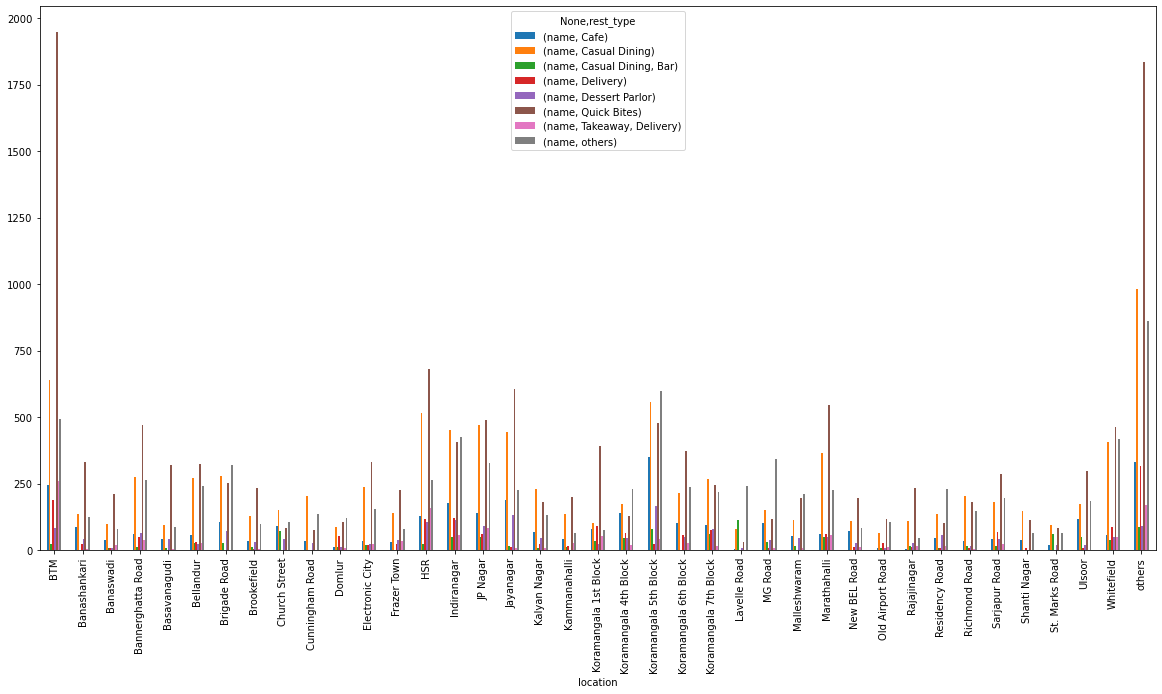

In [60]:
df2.plot( kind='bar' , figsize=(20,10))

In [61]:
#no of votes location wise 

df4=df[['location','votes']]
df4.drop_duplicates
df5=df4.groupby(['location'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214827
Indiranagar,1172729
Koramangala 4th Block,685156
others,624030
Church Street,594979


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'MG Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),
  Text(26, 

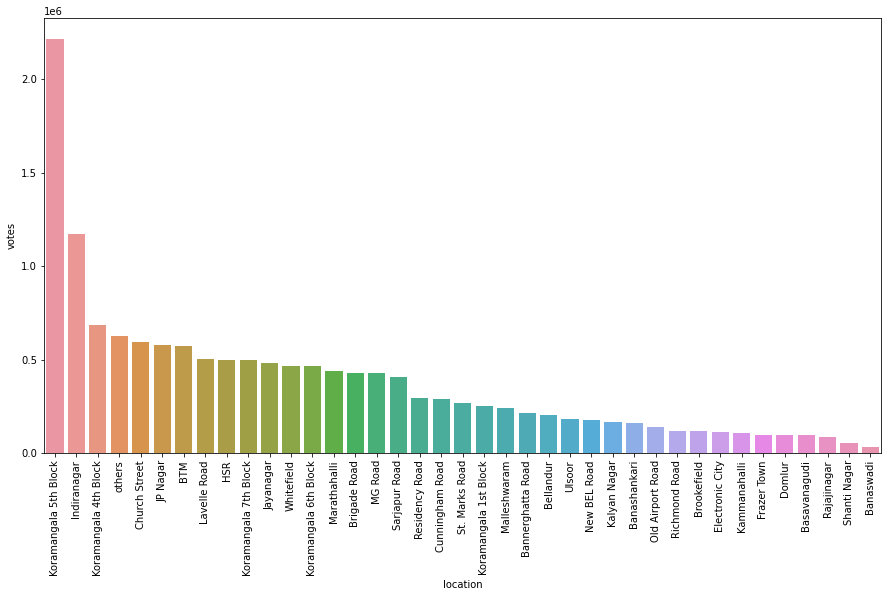

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(df5.index ,df5['votes'])
plt.xticks(rotation=90)